In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re

In [2]:
#reading in the lyrics dataset
lyrics = pd.read_csv('lyrics.csv')

In [3]:
#checking out the first few lines
lyrics.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
#checking if there is anything out of the ordinary in terms of consistency
#we see that there are almost 100000 songs that do not have lyrics, so we can get rid of those
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [5]:
#dropping any rows that have no lyrics
lyrics = lyrics.dropna()

In [6]:
#checking to make sure that all the empty rows were dropped and it looks like they were
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 6 columns):
index     266556 non-null int64
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(2), object(4)
memory usage: 14.2+ MB


In [7]:
#using to get an idea of range of years we have in this data set and it seems to be mostly from 2000's
lyrics.describe()

,index,year
count,266556.000000,266556.000000
mean,181938.409760,2007.654909
std,104125.770697,10.115249
min,0.000000,67.000000
25%,92455.750000,2006.000000
50%,182105.500000,2007.000000
75%,272055.250000,2010.000000
max,362236.000000,2016.000000


In [8]:
#checking all the unique genres in the dataset. It seem there are about 11 and one Not Available
genres = lyrics['genre'].unique()
print(genres)

['Pop' 'Hip-Hop' 'Not Available' 'Rock' 'Metal' 'Other' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie']


In [9]:
#checking out how many songs belong to each genre. It seems like Rock accounts for about 40% of the dataset
genres_count = lyrics.genre.value_counts()
print(genres_count)

Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: genre, dtype: int64


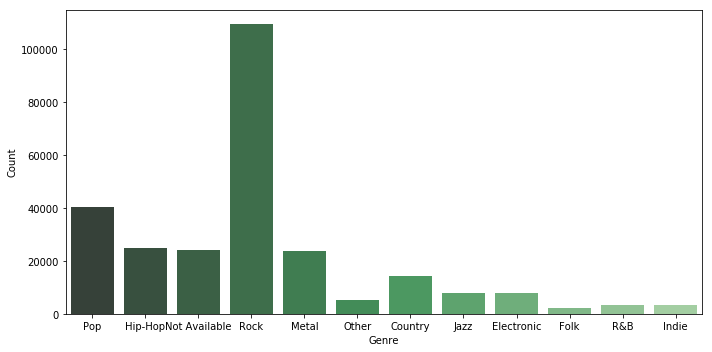

In [10]:
#putting it in a plot just to get an idea
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=lyrics, palette='Greens_d')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()

In [11]:
#checking how many artists songs are in the dataset. It seems like there may be a lot of duplicates
#I don't think there could be as many as 450 to 700 songs from each of these artists
artist_count = lyrics.artist.value_counts()
print(artist_count.head(20))

#checking how many individual artists there are. About 14500 all together
artist_count.count()    

dolly-parton         744
elton-john           676
chris-brown          628
barbra-streisand     607
bob-dylan            596
eddy-arnold          591
bee-gees             591
eminem               578
ella-fitzgerald      571
david-bowie          570
american-idol        568
dean-martin          560
b-b-king             543
celine-dion          540
elvis-costello       522
bruce-springsteen    509
beach-boys           495
bill-anderson        466
eric-clapton         461
frank-zappa          457
Name: artist, dtype: int64


14543

In [12]:
#checking to see if there are duplicates in the dataset
#dolly = lyrics[lyrics['artist'] == 'dolly-parton']
#dolly.sort_values(by = 'song').head(50)

In [13]:
#This is to add genres to their own data slices
#could be used later for wordcloud perhaps

#not_available = lyrics[lyrics['genre'] == 'Not Available']
#print(not_available.head(20))

In [14]:
#print(not_available.sort_values(by='artist').head(20))

In [15]:
lyricsep = lyrics['lyrics']

In [16]:
type(lyricsep)

pandas.core.series.Series

In [17]:
#lyricsep=pd.DataFrame(lyricsep)

In [18]:
lyricsep[0]

"Oh baby, how you doing?\nYou know I'm gonna cut right to the chase\nSome women were made but me, myself\nI like to think that I was created for a special purpose\nYou know, what's more special than you? You feel me\nIt's on baby, let's get lost\nYou don't need to call into work 'cause you're the boss\nFor real, want you to show me how you feel\nI consider myself lucky, that's a big deal\nWhy? Well, you got the key to my heart\nBut you ain't gonna need it, I'd rather you open up my body\nAnd show me secrets, you didn't know was inside\nNo need for me to lie\nIt's too big, it's too wide\nIt's too strong, it won't fit\nIt's too much, it's too tough\nHe talk like this 'cause he can back it up\nHe got a big ego, such a huge ego\nI love his big ego, it's too much\nHe walk like this 'cause he can back it up\nUsually I'm humble, right now I don't choose\nYou can leave with me or you could have the blues\nSome call it arrogant, I call it confident\nYou decide when you find on what I'm working 

In [19]:
#lyricsep[425]

In [20]:
replace = ["r/'\p{P}/'","r/'VERSE/'","r/'CHORUS/'","r/'INSTRUMENTAL/'","r/'x\d/'","r/'\dx/'","r/'X\d/'","r/'\d]/'","r/'Bridge/'","r/'HOOK'","r/'Pre/'","r/'INTRO/'","r/'OUTRO/'","r/'\d/'","r/'^\w/'"]

In [21]:
#lyricsep4 = lyricsep.replace('Chorus', '')
#lyricsep4[8]

In [23]:
#we are only taking away the \n and keeping this separate in case or for testing function
lyricsep2 = [re.sub(r'\n',' ', i) for i in lyricsep]
lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'\p{P}','', i) for i in lyricsep2]
lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Chorus','', i, flags=re.IGNORECASE) for i in lyricsep2]
lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub]
# lyricsep2 = 
print(lyricsep2[2])

If you search For tenderness It isnt hard to find You can have the love You need to live But if you look For truthfulness You might just As well be blind It always seems to be So hard to give  Honesty Is such a lonely word Everyone is so untrue Honesty Is hardly ever heard And mostly What I need from you I can always Find someone To say They sympathize If I wear my heart Out on my sleeve But I dont want Some pretty face To tell me Pretty lies All I want Is someone To believe  I can find a lover I can find a friend I can have security Until the bitter end Anyone can comfort me With promises again I know I know When Im deep Inside of me Dont be Too concerned I wont ask For nothin While Im gone But when I want Sincerity Tell me where else Can I turn When Youre the one That I depend upon 


In [24]:
for j in replace:
    print(j)

r/'\p{P}/'
r/'VERSE/'
r/'CHORUS/'
r/'INSTRUMENTAL/'
r/'x\d/'
r/'\dx/'
r/'X\d/'
r/'\d]/'
r/'Bridge/'
r/'HOOK'
r/'Pre/'
r/'INTRO/'
r/'OUTRO/'
r/'\d/'
r/'^\w/'


In [25]:
lyricsep2[84]

'Feel like im loosing my mind Love is so hard to find You led me on to believe you belong to me oh oh Im going through difficult times I always thought you were mine Love doesnt feel like this This is my final wish Hook The next time your truck rolls by No matter how hard I cry Please dont stop in front of me Cause your loves no longer sweet The next time I bring you change Baby please pull back your hand You know your not what I need Let me go Let me do B  Youve got me chasing after you like an ice cream truck I try my luck and catch up but it always out of luck and my heart just melts Youve got me chasing after you like an ice cream truck i try my luck and catch up but its always out of luck and mt heart just melts Verse 2 Faster and faster I ran You sped up and then Just as I thought Ive caught up Im chasing you again Finally You stopped and I jumped on I realized the flavor was wrong you thought i was still holdin on Its good to know whats goin on hook The next your truck rolls by 

In [26]:
lyricsep3 = [re.sub(j,'',i, flags=re.IGNORECASE) for j in replace for i in lyricsep2]
lyricsep3 = pd.Series(lyricsep3)
lyricsep3[8]

'Verse 1 I read all of the magazines while waiting around you said you couldnt wait to see me but you got stuck in town so turn off the phone now were finally alone and some moments at the end of the day feel your touch and its the sweetest your kisses are my weakness i never want them to go away  i wanna feel you in my heart heart as i look into your eyes eyes no need to get busy so lets take our time and make slow love slow love and every minute that we have have it goes too fast wanna show you how to rock it so this feelin last and make slow love slow love slow love slow love slow love all night Verse 2 it is just a few little things that you gotta know a girl will give you all of her heart when its happening slow i need a little laughter and love will follow after lets take this chance to steal away your kisses are delicious and no one is gonna miss us tonight i really want you to stay  i wanna feel you in my heart heart as i look into your eyes eyes no need to get busy so lets tak

In [27]:
lyricsep3[84]

'Feel like im loosing my mind Love is so hard to find You led me on to believe you belong to me oh oh Im going through difficult times I always thought you were mine Love doesnt feel like this This is my final wish Hook The next time your truck rolls by No matter how hard I cry Please dont stop in front of me Cause your loves no longer sweet The next time I bring you change Baby please pull back your hand You know your not what I need Let me go Let me do B  Youve got me chasing after you like an ice cream truck I try my luck and catch up but it always out of luck and my heart just melts Youve got me chasing after you like an ice cream truck i try my luck and catch up but its always out of luck and mt heart just melts Verse 2 Faster and faster I ran You sped up and then Just as I thought Ive caught up Im chasing you again Finally You stopped and I jumped on I realized the flavor was wrong you thought i was still holdin on Its good to know whats goin on hook The next your truck rolls by 

In [66]:
lyricsep3.head()

0    Oh baby how you doing You know Im gonna cut ri...
1    playin everything so easy its like you seem so...
2    If you search For tenderness It isnt hard to f...
3    Oh oh oh I oh oh oh I Verse 1 If I wrote a boo...
4    Party the people the people the party its popp...
dtype: object

In [29]:
#function to able to strip lyrics to the bare minimum, minus 
def lyricstrip(x):
    
    replacew = [r'\p{P}',r'Verse',r'verse',r'VERSE',r'chorus',r'Chorus',r'CHORUS',r'Instrumental',r'instrumental',r'INSTRUMENTAL',r'x\d',r'\dx',r'X\d',r'\dX',r'Bridge',r'Hook',r'HOOK',r'Pre',r'Intro',r'intro',r'INTRO',r'outro',r'Outro',r'OUTRO',r'\d',r'^A-Za-z0-9+']

    x = [re.sub(r'\n',' ', i) for i in x]
    x = pd.Series(x)
#    x= [re.sub(j, '',i, flags=re.IGNORECASE) for j in replace for i in x]
#    x = pd.Series(x)
#    return x
    for j in replacew:
        for i in x:
            re.sub(j,'',i)
    return pd.Series(x)

In [30]:
lyricstripped = lyricstrip(lyricsep)
print(lyricstripped.head())
lyricstripped[1]

0    Oh baby, how you doing? You know I'm gonna cut...
1    playin' everything so easy, it's like you seem...
2    If you search For tenderness It isn't hard to ...
3    Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...
4    Party the people, the people the party it's po...
dtype: object


"playin' everything so easy, it's like you seem so sure. still your ways, you dont see i'm not sure if they're for me. then things come right along our way, though we didn't truly ask. it seems as if they're gonna linger with every delight they bring, just like what you have truly seemed. i'm trying to think of what you really want to say, even through my darkest day. you might want to leave me, feeling strange about you like you're gonna let me know, when words then slipped out of you. when words dont come so easy to say you just leave me feeling, come what may though i want things coming from your way. i say to you, you bore me all the time when you seem to hold back all in you, all that you want to let me know. why dont you have the courage? speak up and i'll listen, if you truly want me to know, then tell me. is there something wrong with you and you seem fastened there. it sounds as if there'll be a melody if things in you are let out and then i will feel alright. when you sleep, 

In [31]:
lyricstripped[3]

'Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a book about where we stand Then the title of my book would be "Life with Superman" That\'s how you make me feel I count you as a privilege This love is so ideal I\'m honored to be in it I know you feel the same I see it everyday In all the things you do In all the things you say [Chorus:] You are my rock Baby you\'re the truth You are my rock I love to rock with you You are my rock You\'re everything I need You are my rock So baby rock with me I wanna kiss ya, feel ya, please ya just right I wanna touch ya, love ya, baby all night Reward ya, for all the things you do You are my rock I love to rock with you I love to rock with you Oh oh oh I [Verse 2:] If I were to try to count the ways You make me smile I\'d run out of fingers Before I run out of timeless things to talk about Sugar you keeps it going on Make me wanna keep my lovin strong Make me wanna try my best To give you what you want and what you need Give you my whole heart, not just